In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
 
from sklearn.metrics import accuracy_score

In [7]:
credit_card_data = pd.read_csv('G:\Data Analysis\Encryptix Data Science Internship\creditcard.csv')
credit_card_data 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#check is there any missing values or not
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
credit_card_data.duplicated().sum()

1081

In [11]:
credit_card_data.drop_duplicates(inplace = True)

In [12]:
#distribution of legit and fraud transaction
credit_card_data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

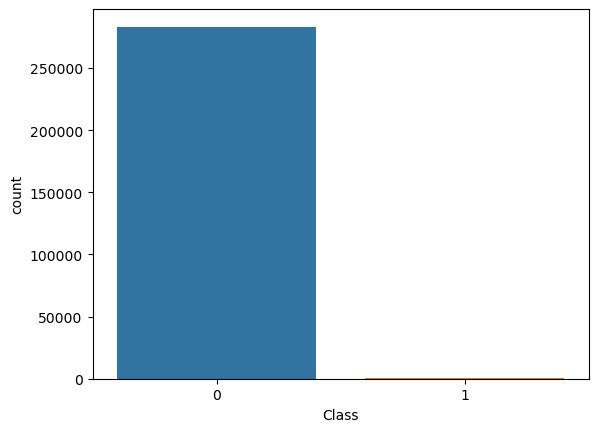

In [13]:
sns.countplot(x='Class', data=credit_card_data)

In [14]:
#0--> for Legit Transaction & 1 for Fraudulent Transaction
#store legit data into legit variable
legit=credit_card_data[credit_card_data.Class ==0]
#store fraud data into fraud variable
fraud=credit_card_data[credit_card_data.Class ==1]

In [15]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [16]:
#statistical measures of the data
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
#compare the values for both transcaton
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [19]:
#taking random 492 values from legit data
legit_sample = legit.sample(n=473)

In [20]:
#joint/ concatenating two dataFrame
new_dataset= pd.concat([legit_sample, fraud], axis=0)

In [21]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
151769,96221.0,-0.326080,1.325468,-0.319896,-0.492470,1.106661,-0.460439,0.825655,-0.129708,1.041681,...,-0.434834,-0.778370,0.151586,0.571626,-0.412596,0.043658,0.186045,0.132249,8.99,0
204876,135484.0,2.202184,-0.537655,-1.623672,-0.322652,-0.358905,-1.393820,0.054593,-0.512389,-0.693248,...,-0.111204,0.383341,-0.007071,0.118472,0.253367,0.946166,-0.079676,-0.076434,10.00,0
268383,163184.0,2.071974,0.125863,-1.699002,0.429870,0.358825,-0.910587,0.155837,-0.212998,0.560315,...,-0.367557,-0.975864,0.349077,0.555693,-0.277859,0.171129,-0.065656,-0.031056,1.98,0
180772,124694.0,0.144705,0.468879,-1.300628,-1.737176,3.039958,3.298205,0.359588,0.820667,-0.203395,...,0.332529,0.928094,-0.240038,0.731974,0.030375,-0.155818,0.076898,0.031374,1.00,0
248379,153920.0,-3.186640,2.790633,-1.479091,-1.168049,0.320528,2.474867,-2.579557,-7.400861,-0.716910,...,-3.640982,1.686533,0.381365,-1.387440,-0.801992,-0.192776,-1.249361,-0.344595,80.00,0


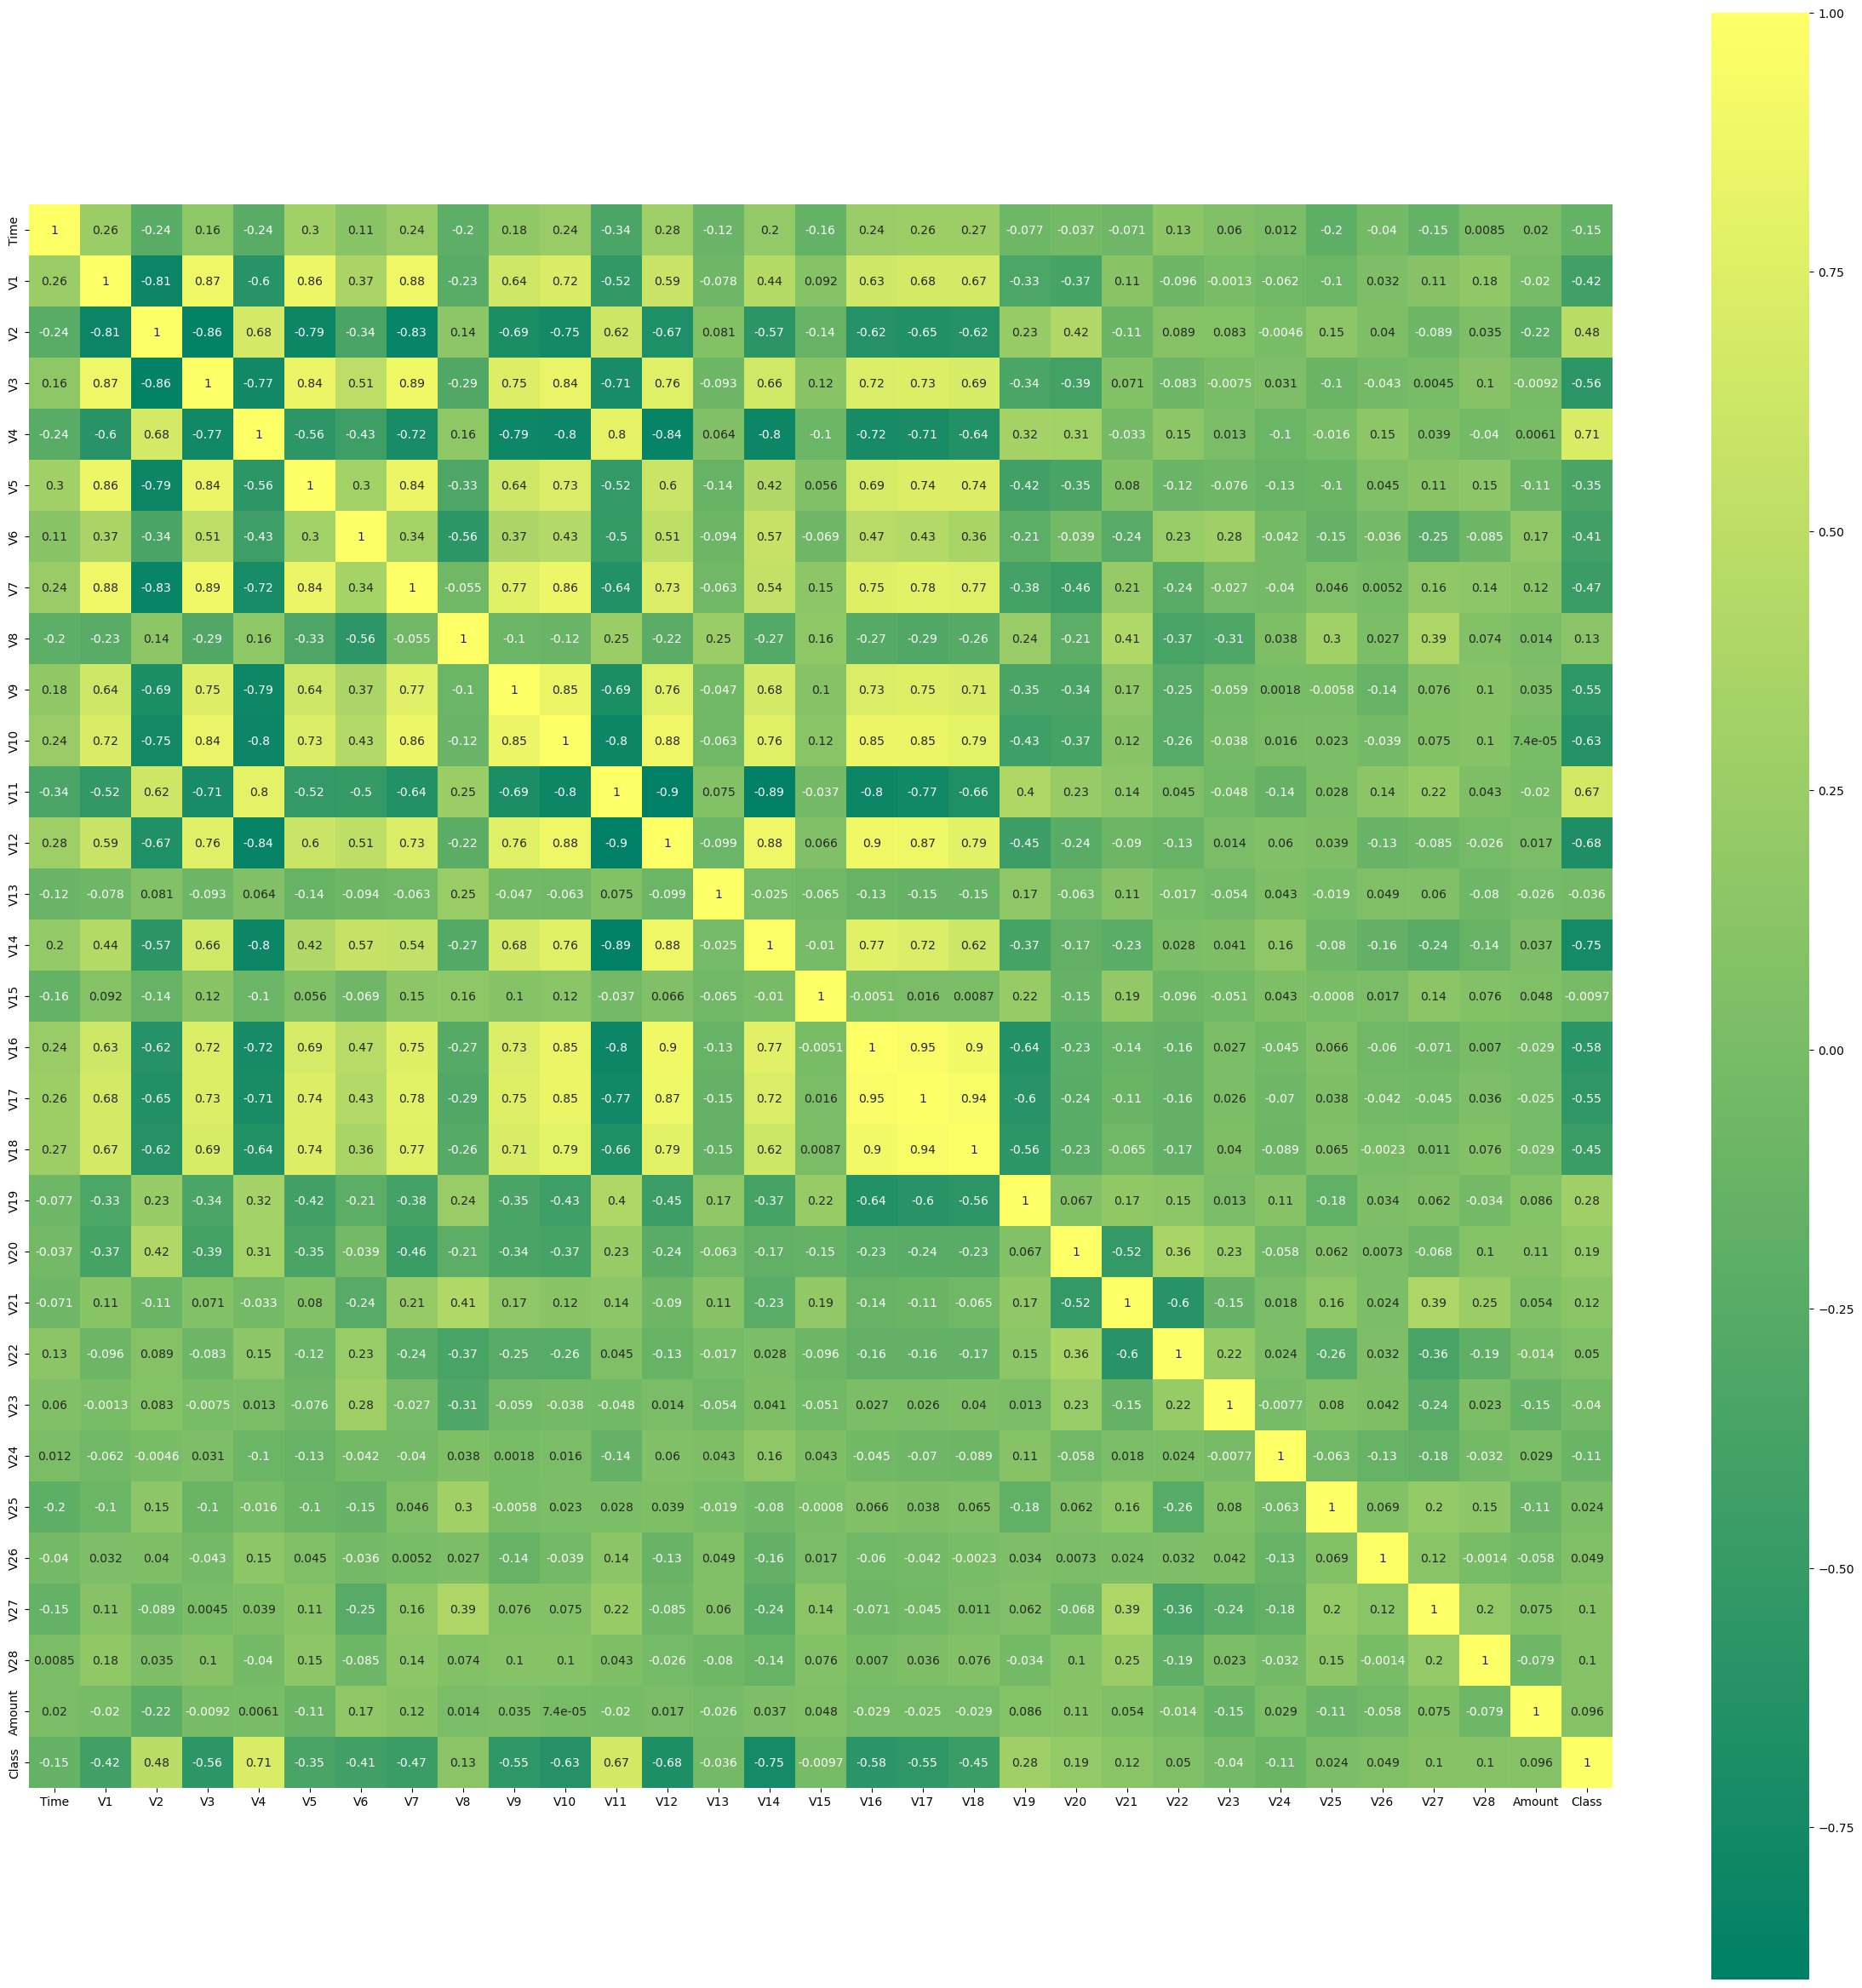

In [24]:
#width 30 and height 30
plt.figure(figsize=(30,30))
#graphical representation of data where the individual values contained in a matrix as colors
#basically shows relation between one variable to another variable
sns.heatmap(new_dataset.corr(),cmap='summer', annot=True, square=True,  )
plt.show()

In [25]:
new_dataset['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

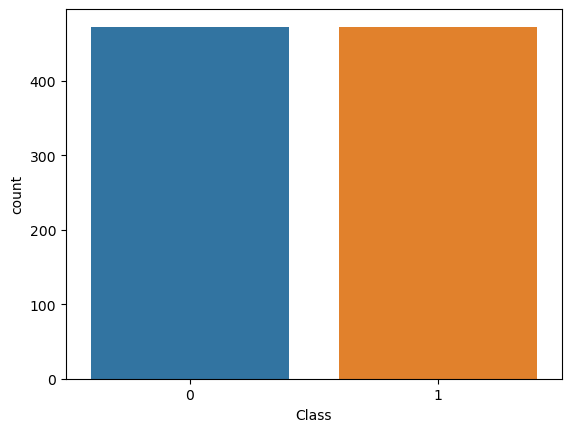

In [26]:
sns.countplot(x='Class', data=new_dataset)

In [27]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95181.987315,0.008671,0.035078,0.037439,-0.075701,-0.078649,-0.096626,-0.030950,-0.077796,0.024229,...,0.005246,-0.026077,-0.010537,-0.006180,0.009421,0.009380,0.002766,0.022666,-0.004751,82.631691
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [28]:
#Spliting the data into Features and Targets
X= new_dataset.drop(columns='Class', axis=1)
Y= new_dataset['Class']

In [29]:
print(X)
print(Y)

            Time        V1        V2        V3        V4        V5        V6  \
151769   96221.0 -0.326080  1.325468 -0.319896 -0.492470  1.106661 -0.460439   
204876  135484.0  2.202184 -0.537655 -1.623672 -0.322652 -0.358905 -1.393820   
268383  163184.0  2.071974  0.125863 -1.699002  0.429870  0.358825 -0.910587   
180772  124694.0  0.144705  0.468879 -1.300628 -1.737176  3.039958  3.298205   
248379  153920.0 -3.186640  2.790633 -1.479091 -1.168049  0.320528  2.474867   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [30]:
#Split the data into Traning data and Testing data
#the class distribution in the target variable 'Y' is preserved in both the training and testing sets
#every time you run this code with random_state=2, the data will be split in the same way, ensuring consistent results
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(946, 30) (756, 30) (190, 30)


In [32]:
#Model Training
model = RobustScaler()

In [33]:
model.fit(X_train, Y_train)

RobustScaler()

In [39]:
#Accuracy Score
xgb= XGBClassifier(n_estimators=10,max_depth=12,learning_rate=.1)

In [40]:
xgb.fit(X_train , Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
print (xgb.score(X_train , Y_train))
print (xgb.score(X_test , Y_test))

0.9854497354497355
0.9052631578947369


In [42]:
con = confusion_matrix(Y_test,xgb.predict(X_test))
con

array([[86,  9],
       [ 9, 86]], dtype=int64)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

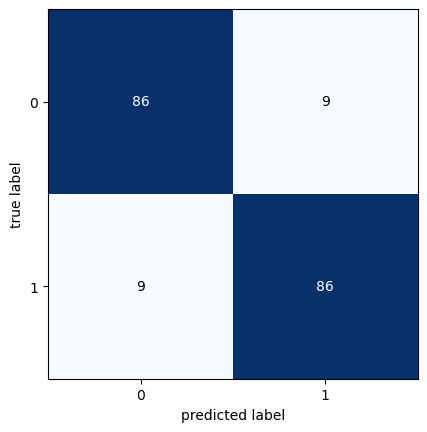

In [43]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(con)

In [44]:
Y_pred = xgb.predict(X_test)
Y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [45]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        95
           1       0.91      0.91      0.91        95

    accuracy                           0.91       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.91      0.91      0.91       190

